In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [ ]:
# run this block to install wordcloud
# pip install wordcloud

In [2]:
data = pd.read_csv('abstract_data.csv')
keywords = data.keywords

In [3]:
clean_items = []
for i in keywords:
    i = i.replace('[', '')   
    i = i.replace(']', '')  
    clean_items.append(i)
    
data.keywords = clean_items

In [4]:
def clean_text(series):
    clean_words = []
    list_of_words = series.split(',')
    for word in list_of_words:
#         word = word.replace('_', ' ')      
        word = word.replace("'", '')
        word = word.lower()
        word = word.strip(' ')
        clean_words.append(word)
    return clean_words

In [5]:
data.keywords = data.keywords.apply(clean_text)

In [6]:
data

,object,pattern_match,merged_noun_chunks,merged_sent,keywords
0,MUC1 variable number tandem repeats (VNTRs) co...,"Therefore, we hypothesize that a MUC1 VNTR TAC...","['Therefore', ',', 'we', 'hypothesize', 'that'...","Therefore , we hypothesize that a_MUC1_VNTR_TA...",[a_liposome-based_anti-cancer_vaccine]
1,BACKGROUND: Mounting evidence suggests that ho...,We conducted a scoping review of the literatur...,"['We', 'conducted', 'a_scoping_review', 'of', ...",We conducted a_scoping_review of the_literatur...,"[a_scoping_review, the_literature, nurses’_dua..."
2,Abstract Enterohemorrhagic Escherichia coli (E...,"Thus, we hypothesize that the expression of si...","['Thus', ',', 'we', 'hypothesize', 'that', 'th...","Thus , we hypothesize that the_expression of s...","[the_expression, sialic_acid_o-acetylesterases..."
3,The digestive tract is the entry site for tran...,"Therefore, we hypothesized that RA could induc...","['Therefore', ',', 'we', 'hypothesized', 'that...","Therefore , we hypothesized that RA could indu...","[ra, dcs, an_immature_mucosal_phenotype, the_s..."
4,BACKGROUND: FIV infection frequently compromis...,We hypothesized that FIV infection may cause d...,"['We', 'hypothesized', 'that', 'FIV_infection'...",We hypothesized that FIV_infection may cause d...,"[fiv_infection, dysregulation, trophoblast_imm..."
...,...,...,...,...,...
546,Abstract P/V gene substitutions convert the no...,"Here, we used two distinct animal model system...","['Here', ',', 'we', 'used', 'two_distinct_anim...","Here , we used two_distinct_animal_model_syste...","[two_distinct_animal_model_systems, the_hypoth..."
547,Alcoholic liver disease (ALD) is characterized...,We hypothesized that TREM‐1 signaling contribu...,"['We', 'hypothesized', 'that', 'TREM‐1', 'sign...",We hypothesized that TREM‐1 signaling contribu...,"[contributes, pathway_activation, ald]"
548,The unique ornamental features and extreme sex...,Innate and adaptive immune genes involved in c...,"['Innate_and_adaptive_immune_genes', 'involved...",Innate_and_adaptive_immune_genes involved in c...,"[innate_and_adaptive_immune_genes, complement_..."
549,"In the recent years, it has been demonstrated ...",Based on an extensive bibliography where the i...,"['Based', 'on', 'an_extensive_bibliography', '...",Based on an_extensive_bibliography where the_i...,"[an_extensive_bibliography, the_immunomodulato..."


In [7]:
# more words are unique than not, i.e. not many words are repeated.
all_words = []
for keywords in data.keywords:
    for word in keywords:
        all_words.append(word)

unique_words = set(all_words)
print(len(all_words))
print(len(unique_words))

3733
3004


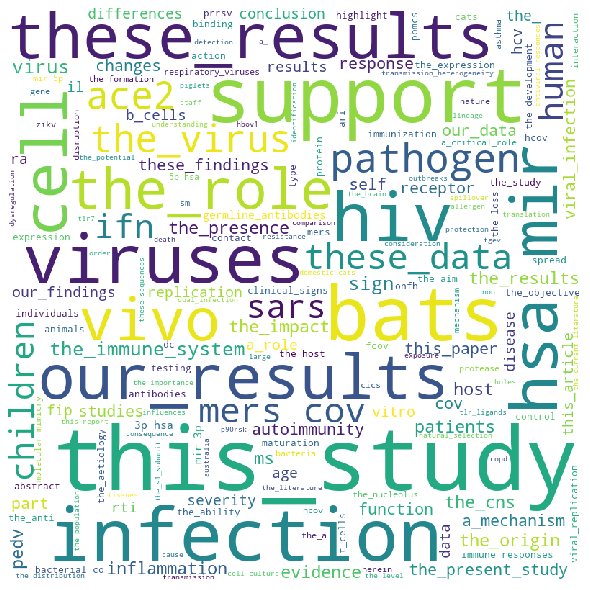

In [10]:
# Python program to generate WordCloud 
stopwords = set(STOPWORDS) 

# removing all hypothesis related words
for word in all_words:
    if 'hypothes' in word:
        all_words.remove(word)

unique_string=(" ").join(all_words)

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(unique_string) 

# plot the WordCloud image 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

_Summary_:
Keywords that inlcuded some form of the word 'hypothesis' were the most prevalent in the list of all keywords. Because these are uninteresting for the content of a hypothesis, these were filtered out. The word cloud above is made up of the remaining words. We see that a lot of keywords are from a single word. Also, prevalent keywords are about the research, as in words such as 'this_study' or 'these_results' or 'the_role'. 